In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib

data_url = 'https://data.cityofchicago.org/resource/fg6s-gzvg.json'

In [63]:
query = (data_url+'?'
           '$select=date_trunc_ym(start_time) AS month, count(*) AS total_{0:s}'
           '&$group=month'
           '&$where=user_type=\'{0:s}\'')

# Customer
trips_f = pd.read_json(query.replace(' ', '%20').format('Customer'))
trips_f['month'] = pd.to_datetime(trips_f['month'])
trips_f.sort_values(by='month', inplace=True)
trips_f.set_index('month', inplace=True)

# Subscriber
trips_m = pd.read_json(query.replace(' ', '%20').format('Subscriber'))
trips_m['month'] = pd.to_datetime(trips_m['month'])
trips_m.sort_values(by='month', inplace=True)
trips_m.set_index('month', inplace=True)

trips_total = pd.concat([trips_f, trips_m], axis=1)
print trips_total.head()

            total_Customer  total_Subscriber
month                                       
2013-06-01            3120               885
2013-07-01           51548             23319
2013-08-01          110101             60407
2013-09-01          105335             95695
2013-10-01           64201            110494


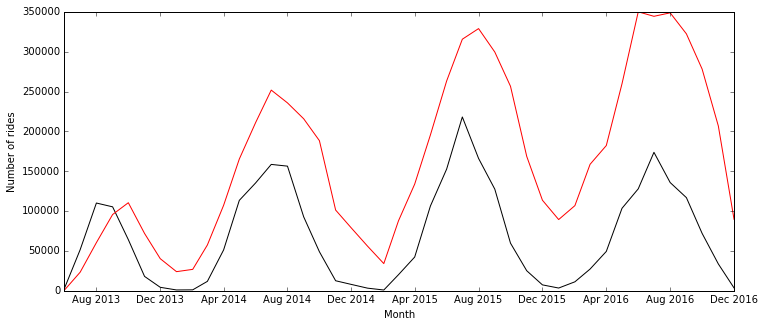

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(trips_total.index, trips_total['total_Customer'], 'k')
plt.plot(trips_total.index, trips_total['total_Subscriber'], 'r')

plt.xlabel('Month')
plt.ylabel('Number of rides')

plt.show()